In [15]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [20]:
#import dataset
data = pd.read_csv("Shopping_CustomerData.csv")
x = data[['CustomerAge','AnnualIncome','CreditScore','SpendingScore']]
y = data[['CustomerGender']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state =1)
y_train

,CustomerGender
116,Female
67,Female
78,Female
42,Male
17,Male
5,Female
127,Male
105,Female
48,Female
66,Female


In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)

#Predict the response for test dataset
predicted_y = clf.predict(x_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))

Accuracy: 0.48333333333333334


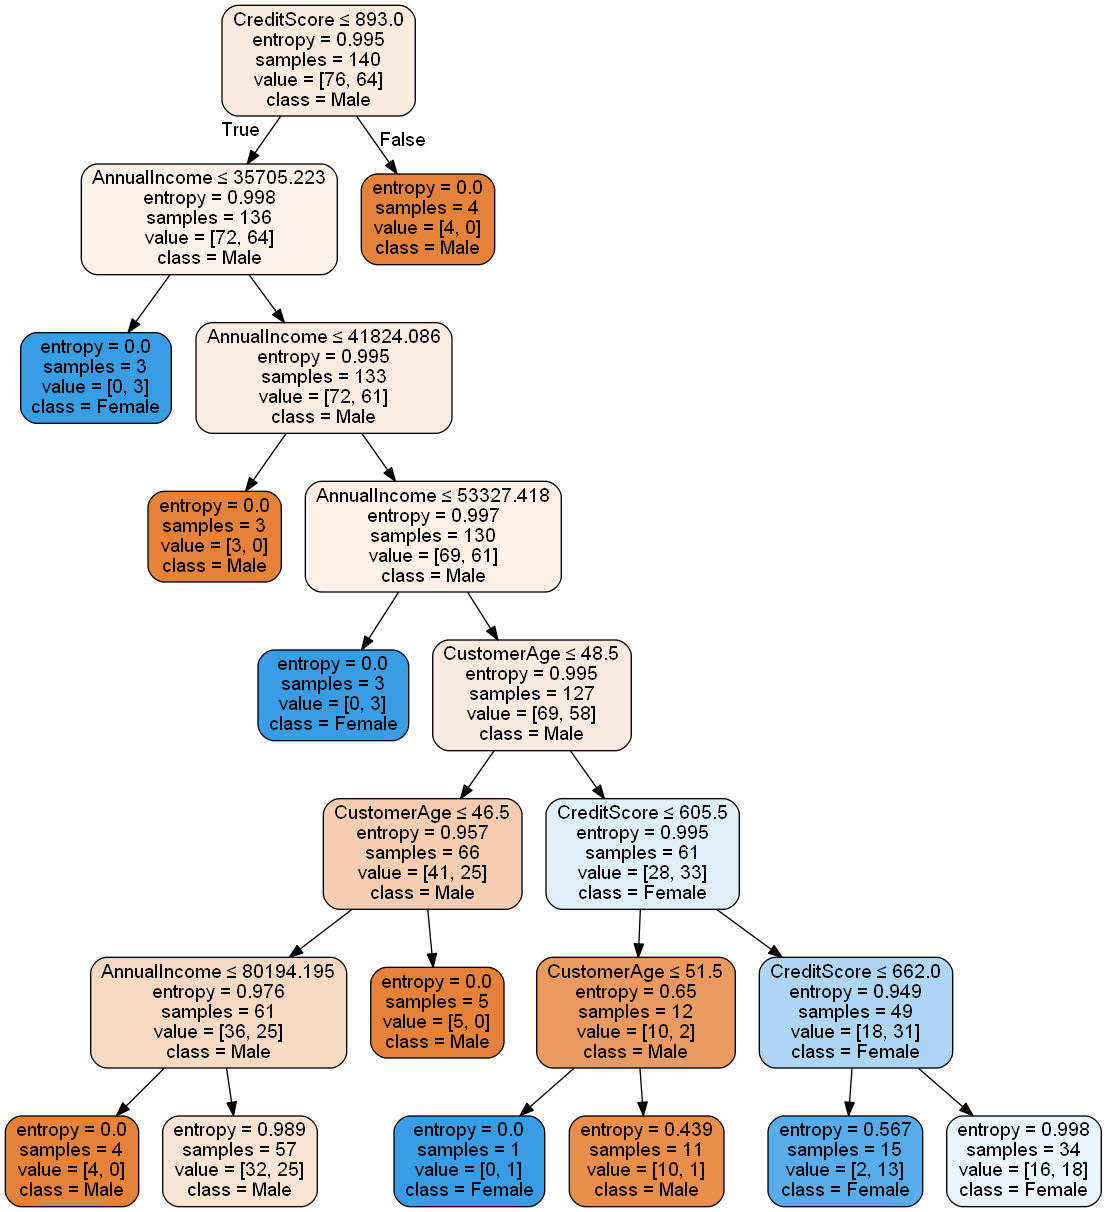

In [25]:
feature_cols = ['CustomerAge','AnnualIncome','CreditScore','SpendingScore']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Male','Female'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Shopping_CustomerData.png')
Image(graph.create_png())